In [0]:
# Ganesh Arvapalli
# NeuroData - 9/25/18

import urllib3
from bs4 import BeautifulSoup
import requests
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
import time
import numpy as np

In [0]:
# Some nice graph statistics that I found on the networkx doc page 
# (https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.html)

def generate_stats(g):
  # Average degree
  t = time.time()
  N,K = g.order(), g.size()
  if N != 0:
    avg_deg = float(K)/N
    print("Average degree:", avg_deg, "took", round(time.time() - t, 3), "seconds")
  # Average neightbor degree
  t = time.time()
  andeg = nx.average_neighbor_degree(g)
  if len(andeg) != 0:
    avg_andeg = sum(andeg.values())/len(andeg)
    print("Average neighbor degree:", avg_andeg, "took", round(time.time() - t, 3), "seconds")
  # Average degree connectivity
  t = time.time()
  adc = nx.average_degree_connectivity(g)
  if len(adc) != 0:
    avg_adc = sum(adc.values())/len(adc)
    print("Average degree connectivity:", avg_adc, "took", round(time.time() - t, 3), "seconds")
  # Clustering coefficient
  t = time.time()
  ccs = nx.clustering(g)
  if len(ccs) != 0:
    avg_cc = sum(ccs.values())/len(ccs)
    print("Average clustering coefficient:", avg_cc, "took", round(time.time() - t, 3), "seconds")
  # Betweenness centrality
  t = time.time()
  bet_cen = nx.betweenness_centrality(g)
  if len(bet_cen) != 0:
    avg_bc = sum(bet_cen.values())/len(bet_cen)
    print("Betweenness centrality:", avg_bc, "took", round(time.time() - t, 3), "seconds")
  # Closeness centrality
  t = time.time()
  clo_cen = nx.closeness_centrality(g)
  if len(clo_cen) != 0:
    avg_clc = sum(clo_cen.values())/len(clo_cen)
    print("Closeness centrality:", avg_clc, "took", round(time.time() - t, 3), "seconds")
  # Eigenvector centrality
  t = time.time()
  eig_cen = nx.eigenvector_centrality(g)
  if len(eig_cen) != 0:
    avg_ec = sum(eig_cen.values())/len(eig_cen)
    print("Eigenvector centrality:", avg_ec, "took", round(time.time() - t, 3), "seconds")
  # Communicability
#   t = time.time()
#   cmb = nx.communicability(g)
#   total = 0
#   for i in cmb.values():
#     if len(i.values()) != 0:
#       total += sum(i.values())/len(i.values())
#   print("Communicability:", total, "took", round(time.time() - t, 3), "seconds")
  # Estrada Index
  t = time.time()
  ei = nx.estrada_index(g)
  print("Estrada Index:", ei, "took", round(time.time() - t, 3), "seconds")
  # Dispersion
  t = time.time()
  dis = nx.dispersion(g)
  total = 0
  for i in dis.values():
    if len(i.values()) != 0:
      total += sum(i.values())/len(i.values())
  print("Dispersion:", total, "took", round(time.time() - t, 3), "seconds")
  # Chordality
  t = time.time()
  if len(list(g.nodes_with_selfloops())) == 0:
    if nx.is_chordal(g):
      chordal = 1
      print("Chordality:", 1, "took", round(time.time() - t, 3), "seconds")
  else:
    chordal = 0
    print("Chordality:", 0, "took", round(time.time() - t, 3), "seconds")
  # Average number of cliques
  t = time.time()
  nc = nx.number_of_cliques(g)
  if len(nc) != 0:
    avg_nc = sum(nc.values())/len(nc)
#     print("Number of cliques:", avg_nc, "took", round(time.time() - t, 3), "seconds")
  # Radius (min ecc)
  t = time.time()
  r = nx.radius(g)
#   print("Radius:", r, "took", round(time.time() - t, 3), "seconds")
  # Diameter (max ecc)
  t = time.time()
  d = nx.diameter(g)
#   print("Diameter:", d, "took", round(time.time() - t, 3), "seconds")
  # Average Eccentricity
  t = time.time()
  e = nx.eccentricity(g)
  if len(e) != 0:
    avg_e = sum(e.values())/len(e)
#     print("Average eccentricity:", avg_e, "took", round(time.time() - t, 3), "seconds")
  # Eulerian
  t = time.time()
#   if nx.is_eulerian(g):
#     print("Eulerianness:", 1, "took", round(time.time() - t, 3), "seconds")
#   else:
#     print("Eulerianness:", 0, "took", round(time.time() - t, 3), "seconds")
  # Num isolates
  t = time.time()
  n_iso = len(list(nx.isolates(g)))
#   print("Number of isolates:", n_iso, "took", round(time.time() - t, 3), "seconds")
  # # Rich-club coefficient:
  # t = time.time()
  # rcc = nx.rich_club_coefficient(g)
  # avg_rcc = sum(rcc.values())/len(rcc)
  # print("Rich-club coefficient:", avg_rcc, "took", round(time.time() - t, 3), "seconds"
  # Shortest path length:
  t = time.time()
  avg_spl = nx.average_shortest_path_length(g)
#   print("Average shortest path length:", avg_spl, "took", round(time.time() - t, 3), "seconds")
  # Closeness vitality
#   t = time.time()
#   cv = nx.closeness_vitality(g)
#   if len(cv) != 0:
#     avg_cv = sum(cv.values())/len(cv)
#     print("Closeness vitality:", avg_cv, "took", round(time.time() - t, 3), "seconds")
  nx.draw(g)

In [0]:
# Format graph statistics as numpy array (to be inserted into data matrix)
# (https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.html)

def stat_vec(g):
  if len(g.nodes()) == 0:
    return np.zeros((1,15))
  # Average degree
  N,K = g.order(), g.size()
  if N != 0:
    avg_deg = float(K)/N
  # Average neightbor degree
  andeg = nx.average_neighbor_degree(g)
  if len(andeg) != 0:
    avg_andeg = sum(andeg.values())/len(andeg)
  # Average degree connectivity
  adc = nx.average_degree_connectivity(g)
  if len(adc) != 0:
    avg_adc = sum(adc.values())/len(adc)
  # Clustering coefficient
  ccs = nx.clustering(g)
  if len(ccs) != 0:
    avg_cc = sum(ccs.values())/len(ccs)
  # Betweenness centrality
  bet_cen = nx.betweenness_centrality(g)
  if len(bet_cen) != 0:
    avg_bc = sum(bet_cen.values())/len(bet_cen)
  # Closeness centrality
  clo_cen = nx.closeness_centrality(g)
  if len(clo_cen) != 0:
    avg_clc = sum(clo_cen.values())/len(clo_cen)
  # Eigenvector centrality
  if len(g.nodes()) != 0:
    eig_cen = nx.eigenvector_centrality(g)
    if len(eig_cen) != 0:
      avg_ec = sum(eig_cen.values())/len(eig_cen)
  else:
    avg_ec = 0
  # Communicability
#   t = time.time()
#   cmb = nx.communicability(g)
#   total = 0
#   for i in cmb.values():
#     if len(i.values()) != 0:
#       total += sum(i.values())/len(i.values())
#   print("Communicability:", total, "took", round(time.time() - t, 3), "seconds")
  # Estrada Index
  ei = nx.estrada_index(g)
  # Dispersion
  dis = nx.dispersion(g)
  total = 0
  for i in dis.values():
    if len(i.values()) != 0:
      total += sum(i.values())/len(i.values())
  # Chordality
#   if len(list(g.nodes_with_selfloops())) == 0:
#     if nx.is_chordal(g):
#       chordal = 1
#   else:
#     chordal = 0
  # Average number of cliques
  nc = nx.number_of_cliques(g)
  if len(nc) != 0:
    avg_nc = sum(nc.values())/len(nc)
  # Radius (min ecc)
  if nx.is_connected(g):
    r = nx.radius(g)
  else:
    r = 0
  # Diameter (max ecc)
  if nx.is_connected(g):
    d = nx.diameter(g)
  else:
    d = 0
  # Average Eccentricity
  if nx.is_connected(g):
    e = nx.eccentricity(g)
    if len(e) != 0:
      avg_e = sum(e.values())/len(e)
  else:
    avg_e = 0
  # Eulerian
#   if nx.is_eulerian(g):
#     print("Eulerianness:", 1, "took", round(time.time() - t, 3), "seconds")
#   else:
#     print("Eulerianness:", 0, "took", round(time.time() - t, 3), "seconds")
  # Num isolates
  n_iso = len(list(nx.isolates(g)))
  # # Rich-club coefficient:
  # rcc = nx.rich_club_coefficient(g)
  # avg_rcc = sum(rcc.values())/len(rcc)
  # Shortest path length:
  if nx.is_connected(g):
    avg_spl = nx.average_shortest_path_length(g)
  else:
    avg_spl = 0
  # Closeness vitality
#   cv = nx.closeness_vitality(g)
#   if len(cv) != 0:
#     avg_cv = sum(cv.values())/len(cv)


  stats = [avg_deg, avg_andeg, avg_adc, avg_cc, avg_bc, avg_clc, avg_ec, ei, total, r, d, avg_e, avg_spl]
  stats = [float(i) for i in stats]

  return np.array(stats)
#  nx.draw(g)

In [5]:
# Still need to do derivatives/func/connectomes/, outputs_dmri/dwi/roi-connectomes, outputs_fmri/func/connectomes, testout/dwi/roi-connectomes/, testout/func/connectomes

http = urllib3.PoolManager()
    
# Open connection to link and get data
groups=["AAL", "CPAC200", "DS00071", "DS00096", "DS00108", 
        "DS00140", "DS00195", "DS00278", "DS00350", "DS00446", 
        "DS00583", "DS00833", "DS01216", "DS01876", "DS03231", 
        "DS06481", "DS16784", "DS72784", "HarvardOxford", 
        "JHU", "Talairach", "desikan", "hemispheric", "slab1068", 
        "slab907", "tissue"]
# Replace NDARAA536PTU with other subject names
subjects=['NDARAA536PTU', 'NDARAD481FXF', 'NDARAE199TDD', 'NDARAJ366ZFA', 
          'NDARAK187ZLP', 'NDARAM277WZT', 'NDARAR025WX4', 'NDARAT100AEQ', 
          'NDARAT299YRR', 'NDARAV747WVL', 'NDARAV894XWD', 'NDARAV945MCQ', 
          'NDARBA507GCT', 'NDARBA521RA8', 'NDARBB854DRN', 'NDARBG702FED', 
          'NDARBK669XJQ', 'NDARBM213BEA', 'NDARBN100LCD', 'NDARBU112XZE', 
          'NDARBV364MBC', 'NDARBZ216FW8', 'NDARCA186WGH', 'NDARCA789EE0', 
          'NDARCB959FY4', 'NDARCD401HGZ', 'NDARCJ007GF8', 'NDARCL080RHP', 
          'NDARCP360AFD', 'NDARCT933HF2', 'NDARCW419GBD', 'NDARDA695XTL', 
          'NDARDB804YHE', 'NDARDC360DGB', 'NDARDH328DR9', 'NDARDJ825GBP', 
          'NDARDK983BDA', 'NDARDM425CG2', 'NDARDN702GXX', 'NDARDN770HY6', 
          'NDARDR658DRA', 'NDARDT800YVF', 'NDARDU799BZF', 'NDARDX469TC1', 
          'NDARDX561MRY', 'NDARDX770PJK', 'NDARDZ946KVL', 'NDAREC182WW2', 
          'NDARED047DTH', 'NDARED632KNG', 'NDAREF057VX5', 'NDAREK375DKR', 
          'NDAREK544ENR', 'NDAREK918EC2', 'NDAREK947FYP', 'NDAREL063PMX', 
          'NDAREM018TJQ', 'NDAREM141CKP', 'NDARET653TAM', 'NDARET949LMU', 
          'NDAREU211JMY', 'NDAREY962BM7', 'NDAREZ098ZPE', 'NDARFA464HJQ', 
          'NDARFB107PVH', 'NDARFB500HHN', 'NDARFH674DWX', 'NDARFL411AT1', 
          'NDARFM080VAF', 'NDARFN452VPC', 'NDARFR109LKT', 'NDARFT834NT1', 
          'NDARFU789PRX', 'NDARFW130NGG', 'NDARFW292PBD', 'NDARFW444PN1', 
          'NDARFY612EMR', 'NDARFZ296UNG', 'NDARGA967MGC', 'NDARGE366WNC', 
          'NDARGL834CMQ', 'NDARGL963HU4', 'NDARGM498YFL', 'NDARGM610LF0', 
          'NDARGT022BEW', 'NDARGY054ENV', 'NDARGY148EVU', 'NDARHB993EV0', 
          'NDARHD059PEQ', 'NDARHF023VG3', 'NDARHJ523XGB', 'NDARHJ946UPH', 
          'NDARHK598YJC', 'NDARHL238VL2', 'NDARHL358LGQ', 'NDARHM273AXL', 
          'NDARHM304AXP', 'NDARHM615PJH', 'NDARHP176DPE', 'NDARHP558MGA', 
          'NDARHP656DLC']

# edgelist_data = {}
data_matrix = np.zeros((1,13))
data_array = np.zeros((1, 13))
count = 0
# for i in groups:
i = "JHU"    # Set this to whatever group/folder you want
for j in subjects:
  temp = {}
  r = http.request("GET", "http://neurodatadesign.s3.amazonaws.com/hbn/derivatives/graphs/" + i + "/sub-" + j + "_acq-64dir_dwi_"+ i + ".edgelist")
  # print(r.status,  "http://neurodatadesign.s3.amazonaws.com/hbn/derivatives/graphs/" + i + "/sub-" + j + "_acq-64dir_dwi_" + i + ".edgelist")
  if r.status == 200:
#       temp[j] = r.data.decode('utf-8').split('\n')
#       edgelist_data[i] = temp
    try:
      filedata = r.data.decode('utf-8').split('\n')
      # Do what you want with the file data from this point on
      g = nx.parse_edgelist(filedata,  nodetype = int, data=(('weight',float),))
#         plt.figure()
      count += 1
  
      stats = stat_vec(g)
      data_matrix = np.vstack([data_matrix, stats])
      # data_array = np.concatenate((data_array, stats), axis=0)
#         plt.show()
    except ValueError:
      print("ValueError encountered!")
      print(filedata)
      print(j)
      continue
    except TypeError:
      print("TypeError encountered!")
      for i in stats:
        print(type(i))
      break
      
data_matrix = np.delete(data_matrix, 0, axis=0)


ValueError encountered!
['']
NDARDX770PJK


In [6]:
import pickle

print("Done collecting data")
print("Data shape:", data_matrix.shape)
# print(data_matrix)
print("Total number of graphs read:", count)
print("Number of features:", data_matrix.shape[1])

print(sum(data_matrix[:,12]))

with open('data_matrix.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([data_matrix], f)

Done collecting data
Data shape: (100, 13)
Total number of graphs read: 101
Number of features: 13
164.55635214307733


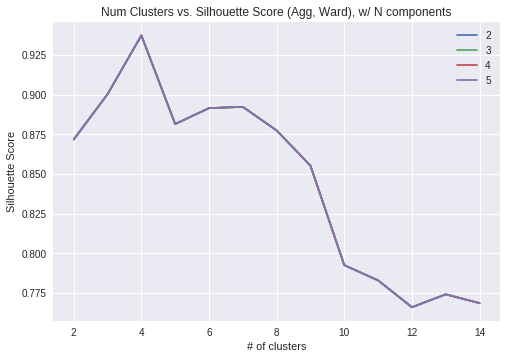

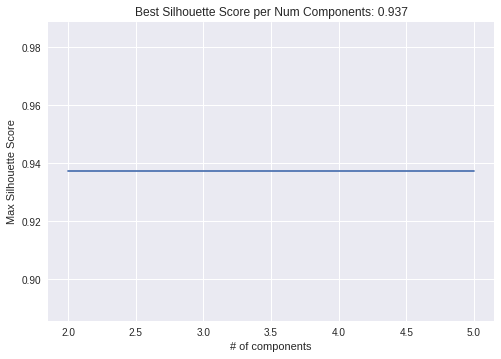

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import math

best_ss = []
plt.figure()
plt.title('Num Clusters vs. Silhouette Score (Agg, Ward), w/ N components')
for i in range(2,6):
  x = range(2,15)
  y = []
  for j in x:
    pca = PCA(n_components=i, svd_solver='full')
    X = pca.fit_transform(data_matrix)
    clustering = AgglomerativeClustering(n_clusters=j).fit(X)
    # print(clustering.labels_)
    y.append(silhouette_score(X, clustering.labels_, metric='sqeuclidean'))
  
  
  
  plt.xlabel('# of clusters')
  plt.ylabel('Silhouette Score')
  plt.plot(x, y)

  best_ss.append(max(y))

  
plt.legend(range(2,6))
plt.show()
  
plt.figure()
plt.title('Best Silhouette Score per Num Components: ' + str(round(max(best_ss), 3)))
plt.xlabel('# of components')
plt.ylabel('Max Silhouette Score')
plt.plot(range(2,6), best_ss)
plt.show()


0.9373029891050941


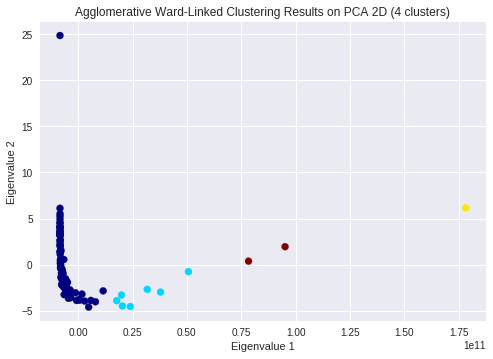

In [8]:
# Best case scenario
pca = PCA(n_components=2, svd_solver='full')
X = pca.fit_transform(data_matrix)
aggclust = AgglomerativeClustering(n_clusters=4).fit(X)
# print(clustering.labels_)
print(silhouette_score(X, aggclust.labels_, metric='sqeuclidean'))

plt.figure()
plt.title("Agglomerative Ward-Linked Clustering Results on PCA 2D (4 clusters)")
plt.xlabel("Eigenvalue 1")
plt.ylabel("Eigenvalue 2")
plt.scatter(X[:, 0], X[:, 1], c=aggclust.labels_,cmap=plt.cm.jet)
plt.show()

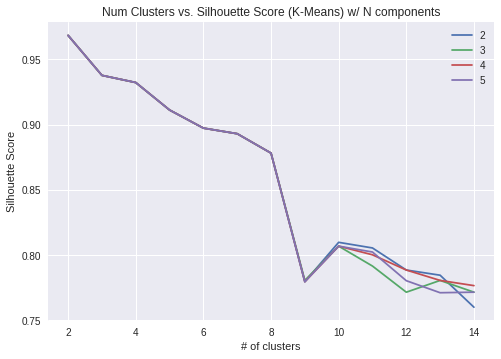

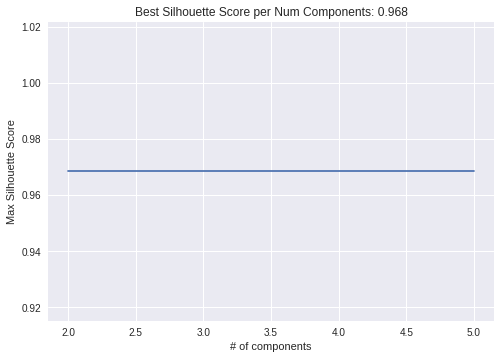

In [9]:
from sklearn.cluster import KMeans

best_ss = []
plt.figure()
plt.title('Num Clusters vs. Silhouette Score (K-Means) w/ N components')
for i in range(2,6):
  x = range(2,15)
  y = []
  for j in x:
    pca = PCA(n_components=i, svd_solver='full')
    X = pca.fit_transform(data_matrix)
    clustering = KMeans(n_clusters=j).fit(X)
    # print(clustering.labels_)
    y.append(silhouette_score(X, clustering.labels_, metric='sqeuclidean'))
  
  
  
  plt.xlabel('# of clusters')
  plt.ylabel('Silhouette Score')
  plt.plot(x, y)

  best_ss.append(max(y))

  
plt.legend(range(2,6))
plt.show()
  
plt.figure()
plt.title('Best Silhouette Score per Num Components: ' + str(round(max(best_ss), 3)))
plt.xlabel('# of components')
plt.ylabel('Max Silhouette Score')
plt.plot(range(2,6), best_ss)
plt.show()


0.9684432075484792


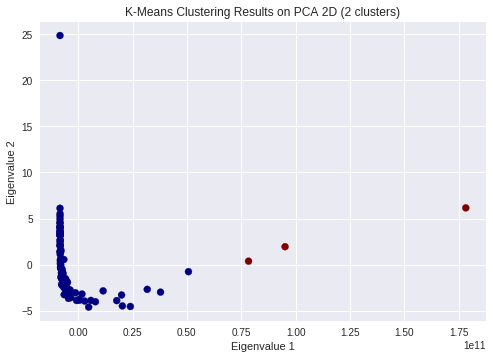

In [10]:
# Best case scenario
pca = PCA(n_components=2, svd_solver='full')
X = pca.fit_transform(data_matrix)
kmeans = KMeans(n_clusters=2).fit(X)
# print(clustering.labels_)
print(silhouette_score(X, kmeans.labels_, metric='sqeuclidean'))

plt.figure()
plt.title("K-Means Clustering Results on PCA 2D (2 clusters)")
plt.xlabel("Eigenvalue 1")
plt.ylabel("Eigenvalue 2")
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_,cmap=plt.cm.jet)
plt.show()

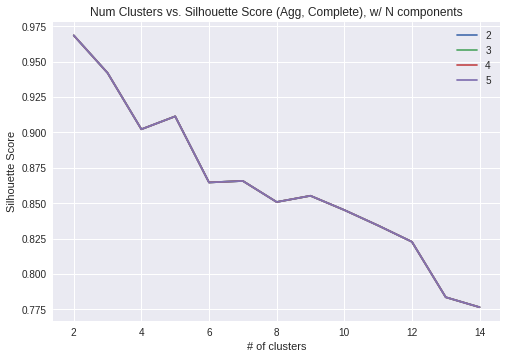

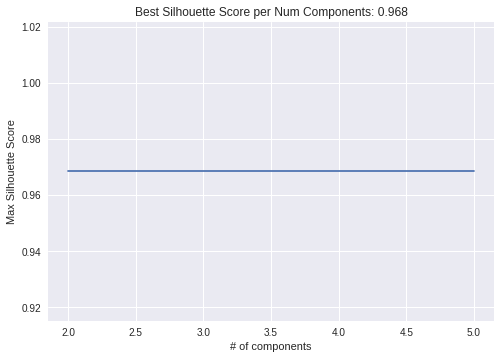

In [11]:
best_ss = []
plt.figure()
plt.title('Num Clusters vs. Silhouette Score (Agg, Complete), w/ N components')
for i in range(2,6):
  x = range(2,15)
  y = []
  for j in x:
    pca = PCA(n_components=i, svd_solver='full')
    X = pca.fit_transform(data_matrix)
    clustering = AgglomerativeClustering(n_clusters=j, linkage="complete").fit(X)
    # print(clustering.labels_)
    y.append(silhouette_score(X, clustering.labels_, metric='sqeuclidean'))
  
  
  
  plt.xlabel('# of clusters')
  plt.ylabel('Silhouette Score')
  plt.plot(x, y)

  best_ss.append(max(y))

  
plt.legend(range(2,6))
plt.show()
  
plt.figure()
plt.title('Best Silhouette Score per Num Components: ' + str(round(max(best_ss), 3)))
plt.xlabel('# of components')
plt.ylabel('Max Silhouette Score')
plt.plot(range(2,6), best_ss)
plt.show()

0.9684432075484792


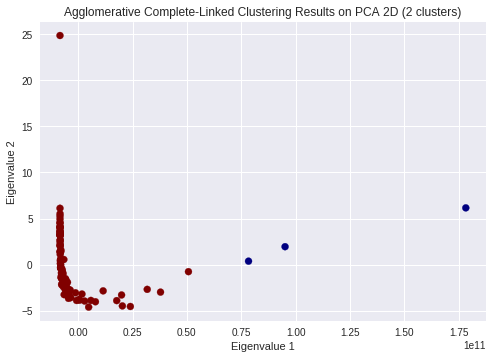

In [12]:
# Best case scenario
pca = PCA(n_components=2, svd_solver='full')
X = pca.fit_transform(data_matrix)
aggclust2 = AgglomerativeClustering(n_clusters=2, linkage="complete").fit(X)
# print(clustering.labels_)
print(silhouette_score(X, aggclust2.labels_, metric='sqeuclidean'))

plt.figure()
plt.title("Agglomerative Complete-Linked Clustering Results on PCA 2D (2 clusters)")
plt.xlabel("Eigenvalue 1")
plt.ylabel("Eigenvalue 2")
plt.scatter(X[:, 0], X[:, 1], c=aggclust2.labels_,cmap=plt.cm.jet)
plt.show()

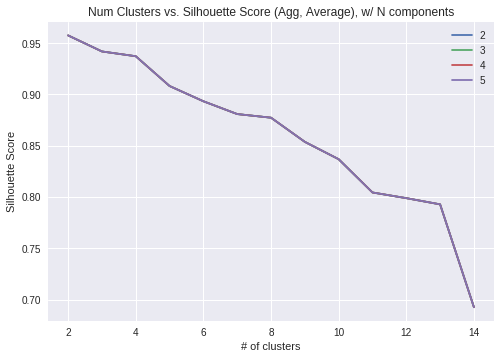

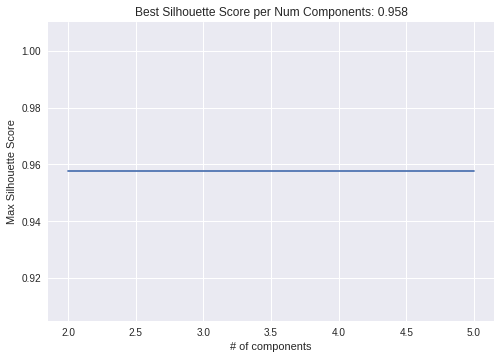

In [13]:
best_ss = []
plt.figure()
plt.title('Num Clusters vs. Silhouette Score (Agg, Average), w/ N components')
for i in range(2,6):
  x = range(2,15)
  y = []
  for j in x:
    pca = PCA(n_components=i, svd_solver='full')
    X = pca.fit_transform(data_matrix)
    clustering = AgglomerativeClustering(n_clusters=j, linkage="average").fit(X)
    # print(clustering.labels_)
    y.append(silhouette_score(X, clustering.labels_, metric='sqeuclidean'))
  
  
  
  plt.xlabel('# of clusters')
  plt.ylabel('Silhouette Score')
  plt.plot(x, y)

  best_ss.append(max(y))

  
plt.legend(range(2,6))
plt.show()
  
plt.figure()
plt.title('Best Silhouette Score per Num Components: ' + str(round(max(best_ss), 3)))
plt.xlabel('# of components')
plt.ylabel('Max Silhouette Score')
plt.plot(range(2,6), best_ss)
plt.show()

0.9575956317621833


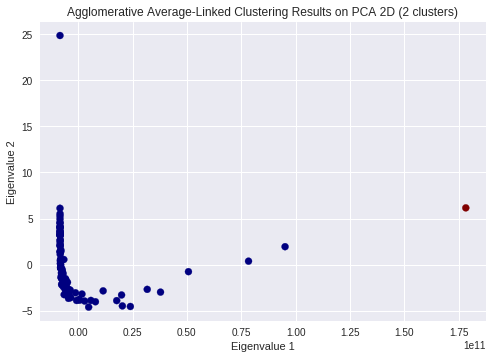

In [14]:
# Best case scenario
pca = PCA(n_components=2, svd_solver='full')
X = pca.fit_transform(data_matrix)
aggclust2 = AgglomerativeClustering(n_clusters=2, linkage="average").fit(X)
# print(clustering.labels_)
print(silhouette_score(X, aggclust2.labels_, metric='sqeuclidean'))

plt.figure()
plt.title("Agglomerative Average-Linked Clustering Results on PCA 2D (2 clusters)")
plt.xlabel("Eigenvalue 1")
plt.ylabel("Eigenvalue 2")
plt.scatter(X[:, 0], X[:, 1], c=aggclust2.labels_,cmap=plt.cm.jet)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


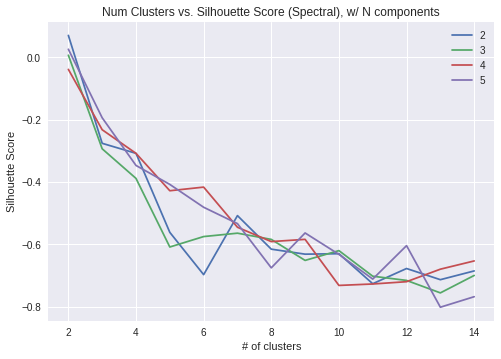

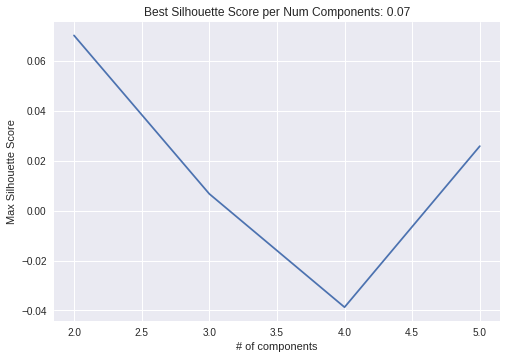

In [15]:
from sklearn.cluster import SpectralClustering

best_ss = []
plt.figure()
plt.title('Num Clusters vs. Silhouette Score (Spectral), w/ N components')
for i in range(2,6):
  x = range(2,15)
  y = []
  for j in x:
    pca = PCA(n_components=i, svd_solver='full')
    X = pca.fit_transform(data_matrix)
    clustering = SpectralClustering(n_clusters=j, assign_labels="discretize").fit(X)
    # print(clustering.labels_)
    y.append(silhouette_score(X, clustering.labels_, metric='sqeuclidean'))
  
  
  
  plt.xlabel('# of clusters')
  plt.ylabel('Silhouette Score')
  plt.plot(x, y)

  best_ss.append(max(y))

  
plt.legend(range(2,6))
plt.show()
  
plt.figure()
plt.title('Best Silhouette Score per Num Components: ' + str(round(max(best_ss), 3)))
plt.xlabel('# of components')
plt.ylabel('Max Silhouette Score')
plt.plot(range(2,6), best_ss)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


ValueError: ignored

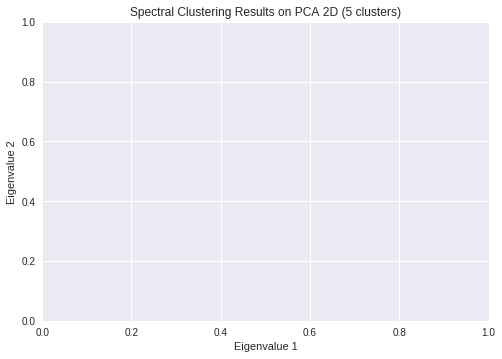

In [18]:
# Best case scenario
pca = PCA(n_components=4, svd_solver='full')
# X = pca.fit_transform(nx.adjacency_matrix(g))
specclust = SpectralClustering(n_clusters=5, assign_labels="discretize").fit(nx.adjacency_matrix(g))
# print(clustering.labels_)
# print(silhouette_score(X, specclust.labels_, metric='sqeuclidean'))

plt.figure()
plt.title("Spectral Clustering Results on PCA 2D (5 clusters)")
plt.xlabel("Eigenvalue 1")
plt.ylabel("Eigenvalue 2")
plt.scatter(X[:, 0], X[:, 1], c=specclust.labels_,cmap=plt.cm.jet)
plt.show()

In [0]:
# r  = http.urlopen("GET", "http://neurodatadesign.s3-website-us-east-1.amazonaws.com/derivatives/graphs/AAL/")
# data = r.data
# r = requests.get("http://neurodatadesign.s3-website-us-east-1.amazonaws.com/derivatives/graphs/AAL/")
# print(r.text)
# soup = BeautifulSoup(data, "lxml")

# for link in soup.find_all('a'):
#     print(link.get('href'))





# # Parse into graph and get eigenvector centrality (as example, 
# # replace with other stats)
# for i in edgelist_data.keys():
#   for j in edgelist_data[i].keys():
#     g = nx.parse_edgelist(edgelist_data[i][j],  nodetype = int, data=(('weight',float),))
#     # Calculate statistics here! (See graph_stats.ipynb)
#     # nx.draw(g)
#     e = nx.eigenvector_centrality(g)
#     # print(e)